### Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df2 = pd.read_csv('data/csse_covid_19_daily_reports_us/12-31-2020.csv')
df3 = pd.read_csv('data/unemployment_rate/unemployment_all_states_2020.csv')
covid_cases = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
covid_death = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

### Data Cleaning

In [3]:
df.head()

,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052


In [4]:
df2.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,NaN,1.336283,84000001.0,USA,38220.054923,NaN
1,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN
2,American Samoa,US,2021-01-01 05:30:27,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,NaN,1.703937,84000004.0,USA,38945.764755,NaN
4,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,NaN,1.632776,84000005.0,USA,67979.497674,NaN


In [5]:
dmf=df.merge(df2, left_on='Name', right_on='Province_State')

In [6]:
dmf.head()

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,NaN,1.336283,84000001.0,USA,38220.054923,NaN
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,NaN,1.703937,84000004.0,USA,38945.764755,NaN
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,NaN,1.632776,84000005.0,USA,67979.497674,NaN
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,California,US,2021-01-01 05:30:27,36.1162,-119.6816,2325599,25986,NaN,2265110.0,6.0,5798.223502,32855482.0,NaN,1.130376,84000006.0,USA,83152.704418,NaN


In [7]:
# Drop unnecessary columns
dmf.drop(columns = ['FIPS_x','Province_State','Country_Region',
                    'Last_Update','Lat','Long_','FIPS_y','People_Hospitalized',
                    'ISO3','Hospitalization_Rate'], inplace = True)

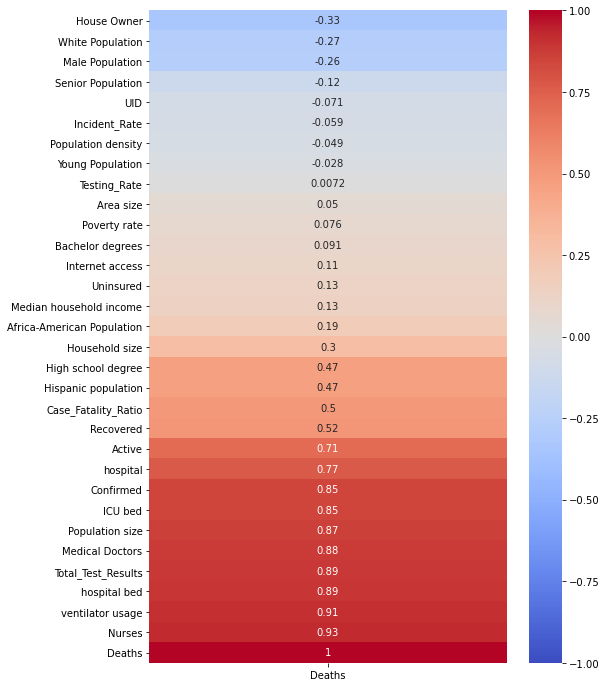

In [8]:
plt.figure(figsize=(8, 12))
sns.heatmap(dmf.corr()[['Deaths']].sort_values('Deaths'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

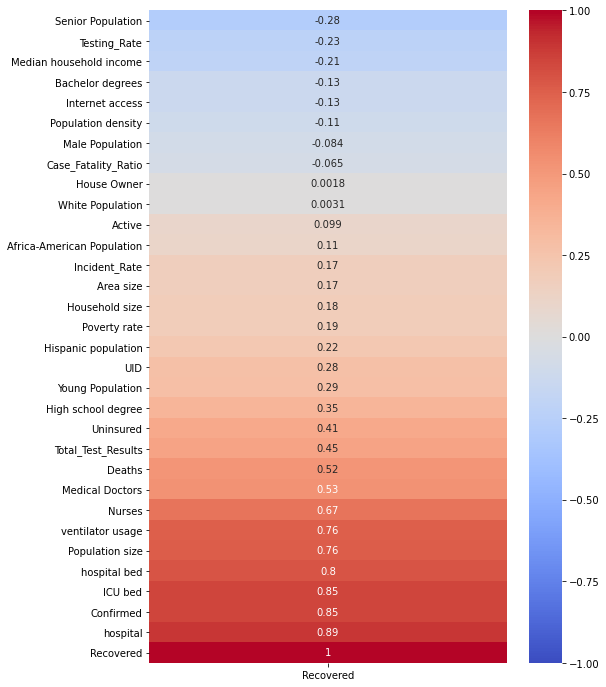

In [9]:
plt.figure(figsize=(8, 12))
sns.heatmap(dmf.corr()[['Recovered']].sort_values('Recovered'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [10]:
# create covid-19 cases monthly columns
covid_cases_states = covid_cases.groupby('Province_State').agg('sum')
covid_cases_states = covid_cases_states[['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20']]

covid_cases_states['cases1'] = covid_cases_states.iloc[:,0]

for i in range(1,12):
    col_name = 'cases'+str(i+1)
    covid_cases_states[col_name] = covid_cases_states.iloc[:,i]-covid_cases_states.iloc[:,i-1]

# Add total cases column
covid_cases_states['casestotal'] = covid_cases_states['12/31/20']

# Drop unwanted columns
covid_cases_states.drop(columns = ['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20'], inplace = True)

In [11]:
# create death monthly columns
covid_death_states = covid_death.groupby('Province_State').agg('sum')
covid_death_states = covid_death_states[['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20']]

covid_death_states['death1'] = covid_death_states.iloc[:,0]
for i in range(1,12):
    col_name = 'death'+str(i+1)
    covid_death_states[col_name] = covid_death_states.iloc[:,i]-covid_death_states.iloc[:,i-1]

# Add total death column
covid_death_states['deathtotal'] = covid_death_states['12/31/20']

# Drop unwanted columns
covid_death_states.drop(columns = ['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20'], inplace = True)


In [12]:
# drop non-states
covid_cases_states.drop(covid_cases_states[covid_cases_states.index.isin(['American Samoa','Diamond Princess','Grand Princess','Northern Mariana Islands','Guam','Virgin Islands'])].index, inplace = True )
covid_death_states.drop(covid_death_states[covid_death_states.index.isin(['American Samoa','Diamond Princess','Grand Princess','Northern Mariana Islands','Guam','Virgin Islands'])].index, inplace = True )

In [13]:
covid_cases_states.head()

,cases1,cases2,cases3,cases4,cases5,cases6,cases7,cases8,cases9,cases10,cases11,cases12,casestotal
Province_State,,,,,,,,,,,,,
Alabama,0,0,1063,6124,11013,20277,49789,38234,28272,38841,55911,111702,361226
Alaska,0,0,129,231,124,658,2574,2457,2672,7510,16221,14410,46986
Arizona,1,0,1288,6366,12281,59292,94782,27825,16672,27439,80871,193390,520207
Arkansas,0,0,523,2758,3972,13524,21734,18713,22473,28493,45169,67779,225138
California,3,9,8221,42479,62207,126805,267482,207366,107619,114064,308697,1080647,2325599


In [14]:
covid_death_states.head()


,death1,death2,death3,death4,death5,death6,death7,death8,death9,death10,death11,death12,deathtotal
Province_State,,,,,,,,,,,,,
Alabama,0,0,23,249,358,320,630,602,358,427,611,1249,4827
Alaska,0,0,3,6,1,4,9,14,19,26,39,85,206
Arizona,0,0,25,295,587,738,2049,1335,621,329,660,2225,8864
Arkansas,0,0,8,53,72,137,183,344,572,556,577,1174,3676
California,0,0,173,1858,2141,1910,3132,3808,2863,1774,1555,6772,25986


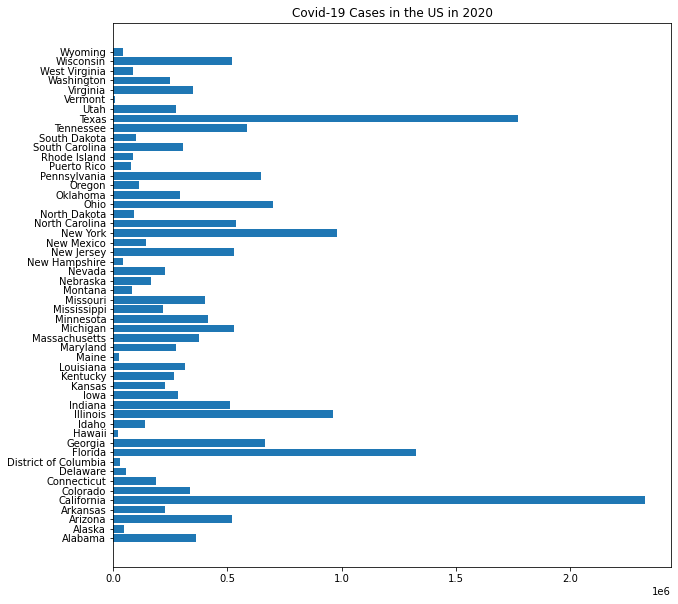

In [15]:
plt.figure(figsize=(10,10)) 
plt.barh(covid_cases_states.index, covid_cases_states['casestotal'])
plt.title('Covid-19 Cases in the US in 2020');

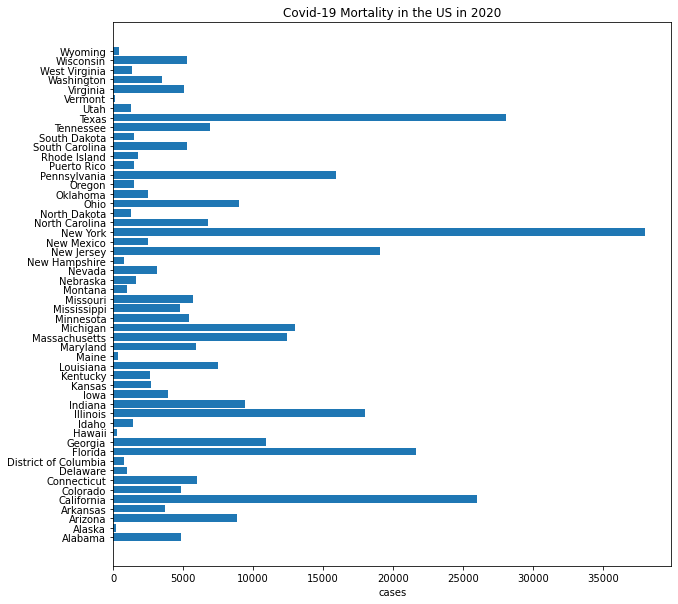

In [16]:
plt.figure(figsize=(10,10)) 
plt.barh(covid_death_states.index, covid_death_states['deathtotal'])
plt.xlabel('cases')
plt.title('Covid-19 Mortality in the US in 2020');

In [17]:
covid_df = pd.merge(covid_cases_states, covid_death_states, left_index = True, right_index= True, how='left')

In [18]:
covid_df.head()

,cases1,cases2,cases3,cases4,cases5,cases6,cases7,cases8,cases9,cases10,cases11,cases12,casestotal,death1,death2,death3,death4,death5,death6,death7,death8,death9,death10,death11,death12,deathtotal
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,1063,6124,11013,20277,49789,38234,28272,38841,55911,111702,361226,0,0,23,249,358,320,630,602,358,427,611,1249,4827
Alaska,0,0,129,231,124,658,2574,2457,2672,7510,16221,14410,46986,0,0,3,6,1,4,9,14,19,26,39,85,206
Arizona,1,0,1288,6366,12281,59292,94782,27825,16672,27439,80871,193390,520207,0,0,25,295,587,738,2049,1335,621,329,660,2225,8864
Arkansas,0,0,523,2758,3972,13524,21734,18713,22473,28493,45169,67779,225138,0,0,8,53,72,137,183,344,572,556,577,1174,3676
California,3,9,8221,42479,62207,126805,267482,207366,107619,114064,308697,1080647,2325599,0,0,173,1858,2141,1910,3132,3808,2863,1774,1555,6772,25986


In [19]:
df3['year_rate'] = round(df3.mean(axis=1),2)

In [20]:
df3['state'][df3['state'] =="DC"] = 'District of Columbia'

<ipython-input-20-77991ac02b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['state'][df3['state'] =="DC"] = 'District of Columbia'


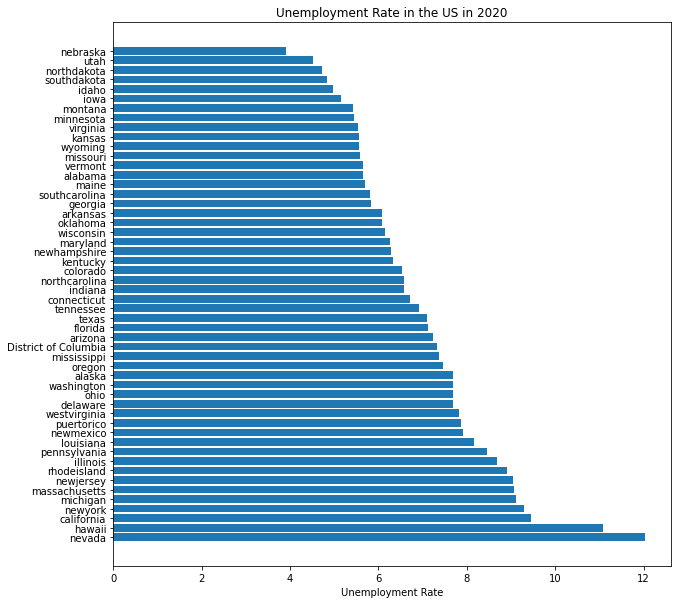

In [21]:
plt.figure(figsize=(10,10)) 
plt.barh(df3.sort_values(by = 'year_rate', ascending= False)['state'], df3.sort_values(by = 'year_rate', ascending= False)['year_rate'])
plt.xlabel('Unemployment Rate')
plt.title('Unemployment Rate in the US in 2020');

In [22]:
covid_df['covid_state'] = covid_df.index

In [23]:
covid_df = covid_df[['covid_state'] + [ col for col in covid_df.columns if col != 'covid_state' ] ]

In [24]:
covid_df

,covid_state,cases1,cases2,cases3,cases4,cases5,cases6,cases7,cases8,cases9,cases10,cases11,cases12,casestotal,death1,death2,death3,death4,death5,death6,death7,death8,death9,death10,death11,death12,deathtotal
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,Alabama,0,0,1063,6124,11013,20277,49789,38234,28272,38841,55911,111702,361226,0,0,23,249,358,320,630,602,358,427,611,1249,4827
Alaska,Alaska,0,0,129,231,124,658,2574,2457,2672,7510,16221,14410,46986,0,0,3,6,1,4,9,14,19,26,39,85,206
Arizona,Arizona,1,0,1288,6366,12281,59292,94782,27825,16672,27439,80871,193390,520207,0,0,25,295,587,738,2049,1335,621,329,660,2225,8864
Arkansas,Arkansas,0,0,523,2758,3972,13524,21734,18713,22473,28493,45169,67779,225138,0,0,8,53,72,137,183,344,572,556,577,1174,3676
California,California,3,9,8221,42479,62207,126805,267482,207366,107619,114064,308697,1080647,2325599,0,0,173,1858,2141,1910,3132,3808,2863,1774,1555,6772,25986
Colorado,Colorado,0,0,2966,12318,11094,6337,14094,10615,13112,36814,125555,101192,334097,0,0,69,708,668,245,148,107,106,234,752,1777,4814
Connecticut,Connecticut,0,0,3128,24572,14501,4313,3296,3069,4671,13657,46088,68413,185708,0,0,69,2188,1687,378,110,33,43,108,404,975,5995
Delaware,Delaware,0,0,319,4415,4764,1976,3314,2641,3184,4338,10703,21802,57456,0,0,3,209,285,69,42,9,35,78,81,203,1014
District of Columbia,District of Columbia,0,0,495,3828,4478,1526,1799,1866,1334,1940,4286,7431,28983,0,0,9,215,242,85,34,22,20,19,34,106,786


In [25]:
covid_df.reset_index(drop=True, inplace=True)

In [26]:
unemp_covid_df = pd.concat([covid_df,df3], axis= 1)

In [27]:
unemp_covid_df.drop(columns= ['Unnamed: 0','state'], inplace = True)

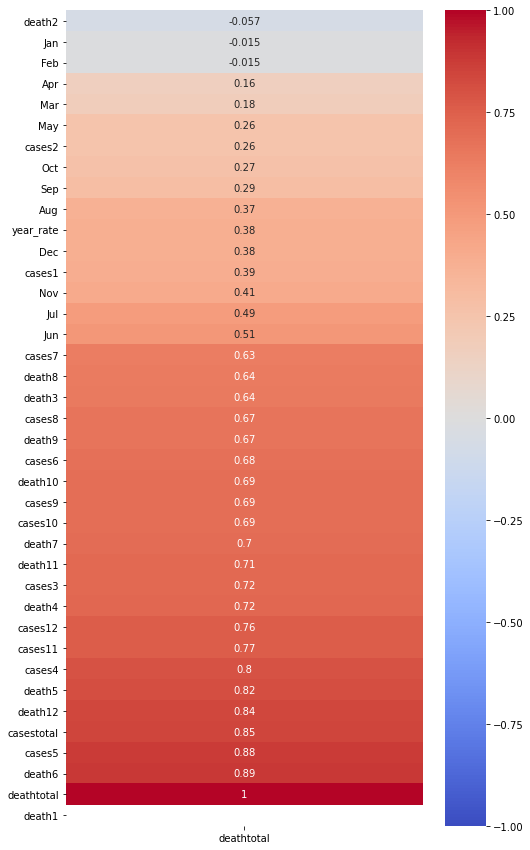

In [30]:
plt.figure(figsize=(8, 15))
sns.heatmap(unemp_covid_df.corr()[['deathtotal']].sort_values('deathtotal'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [ ]:
unemp_covid_df.to_csv('data/yun_data/output/unemployment_covid_2020.csv', index = False)
covid_df.to_csv('data/yun_data/output/covid_monthly_2020.csv',index = False)